In [11]:
from warnings import filterwarnings
filterwarnings("ignore")

In [12]:
import pandas as pd
df = pd.read_csv('banklist.csv', encoding='windows-1250',)
df.columns = [column.strip() for column in df.columns]
df['Closing Date'] = pd.to_datetime(arg=df['Closing Date'], dayfirst=True)
df['year'] = df['Closing Date'].dt.year

df.head()

Bank Name           City State   Cert  \
0             Citizens Bank       Sac City    IA   8758   
1  Heartland Tri-State Bank        Elkhart    KS  25851   
2       First Republic Bank  San Francisco    CA  59017   
3            Signature Bank       New York    NY  57053   
4       Silicon Valley Bank    Santa Clara    CA  24735   

                 Acquiring Institution Closing Date   Fund  year  
0            Iowa Trust & Savings Bank   2023-11-03  10545  2023  
1               Dream First Bank, N.A.   2023-07-28  10544  2023  
2            JPMorgan Chase Bank, N.A.   2023-05-01  10543  2023  
3                  Flagstar Bank, N.A.   2023-03-12  10540  2023  
4  First–Citizens Bank & Trust Company   2023-03-10  10539  2023

In [13]:
df.shape

(568, 8)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568 entries, 0 to 567
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Bank Name              568 non-null    object        
 1   City                   568 non-null    object        
 2   State                  568 non-null    object        
 3   Cert                   568 non-null    int64         
 4   Acquiring Institution  568 non-null    object        
 5   Closing Date           568 non-null    datetime64[ns]
 6   Fund                   568 non-null    int64         
 7   year                   568 non-null    int32         
dtypes: datetime64[ns](1), int32(1), int64(2), object(4)
memory usage: 33.4+ KB


In [15]:
df.isna().sum()

Bank Name                0
City                     0
State                    0
Cert                     0
Acquiring Institution    0
Closing Date             0
Fund                     0
year                     0
dtype: int64

In [16]:
df.duplicated().sum()

0

In [17]:
df.columns

Index(['Bank Name', 'City', 'State', 'Cert', 'Acquiring Institution',
       'Closing Date', 'Fund', 'year'],
      dtype='object')

In [18]:
df.dtypes

Bank Name                        object
City                             object
State                            object
Cert                              int64
Acquiring Institution            object
Closing Date             datetime64[ns]
Fund                              int64
year                              int32
dtype: object

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
cat = list(df.columns[df.dtypes==object])

In [21]:
cat

['Bank Name', 'City', 'State', 'Acquiring Institution']

In [22]:
con = list[df.columns[df.dtypes!=object]]

In [23]:
con

list[Index(['Cert', 'Closing Date', 'Fund', 'year'], dtype='object')]

In [24]:
df['Bank Name'].value_counts().plot(kind='bar', title='bank name', figsize=(108,106))



<Axes: title={'center': 'bank name'}, xlabel='Bank Name'>

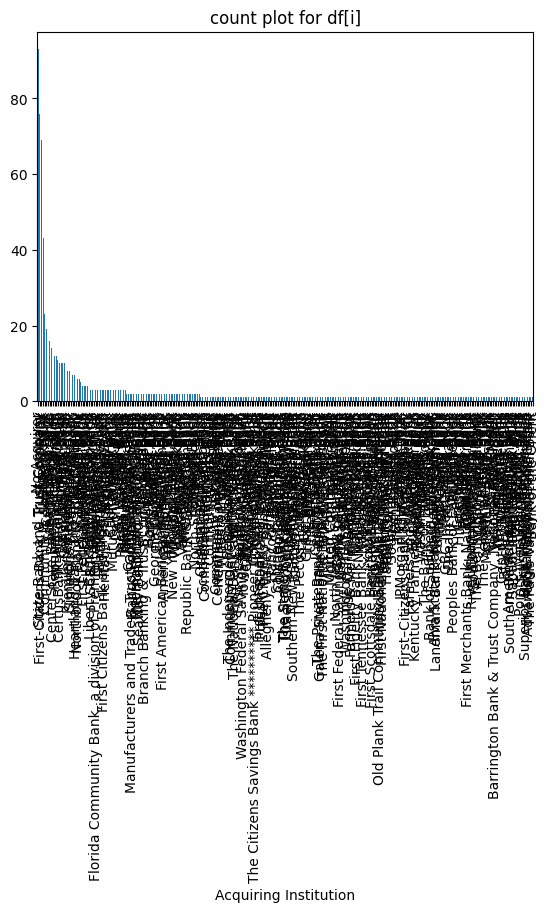

In [25]:
for i in cat:
    df[i].value_counts().plot(kind='bar',title='count plot for df[i]')

In [26]:
plt.figure(figsize=(100,108))
sns.boxplot(data=df, x='Bank Name', y='Closing Date')
plt.title('Boxplot for Bank Name vs Closing Date')
plt.show()

<Axes: title={'center': 'closing date'}, xlabel='Closing Date'>

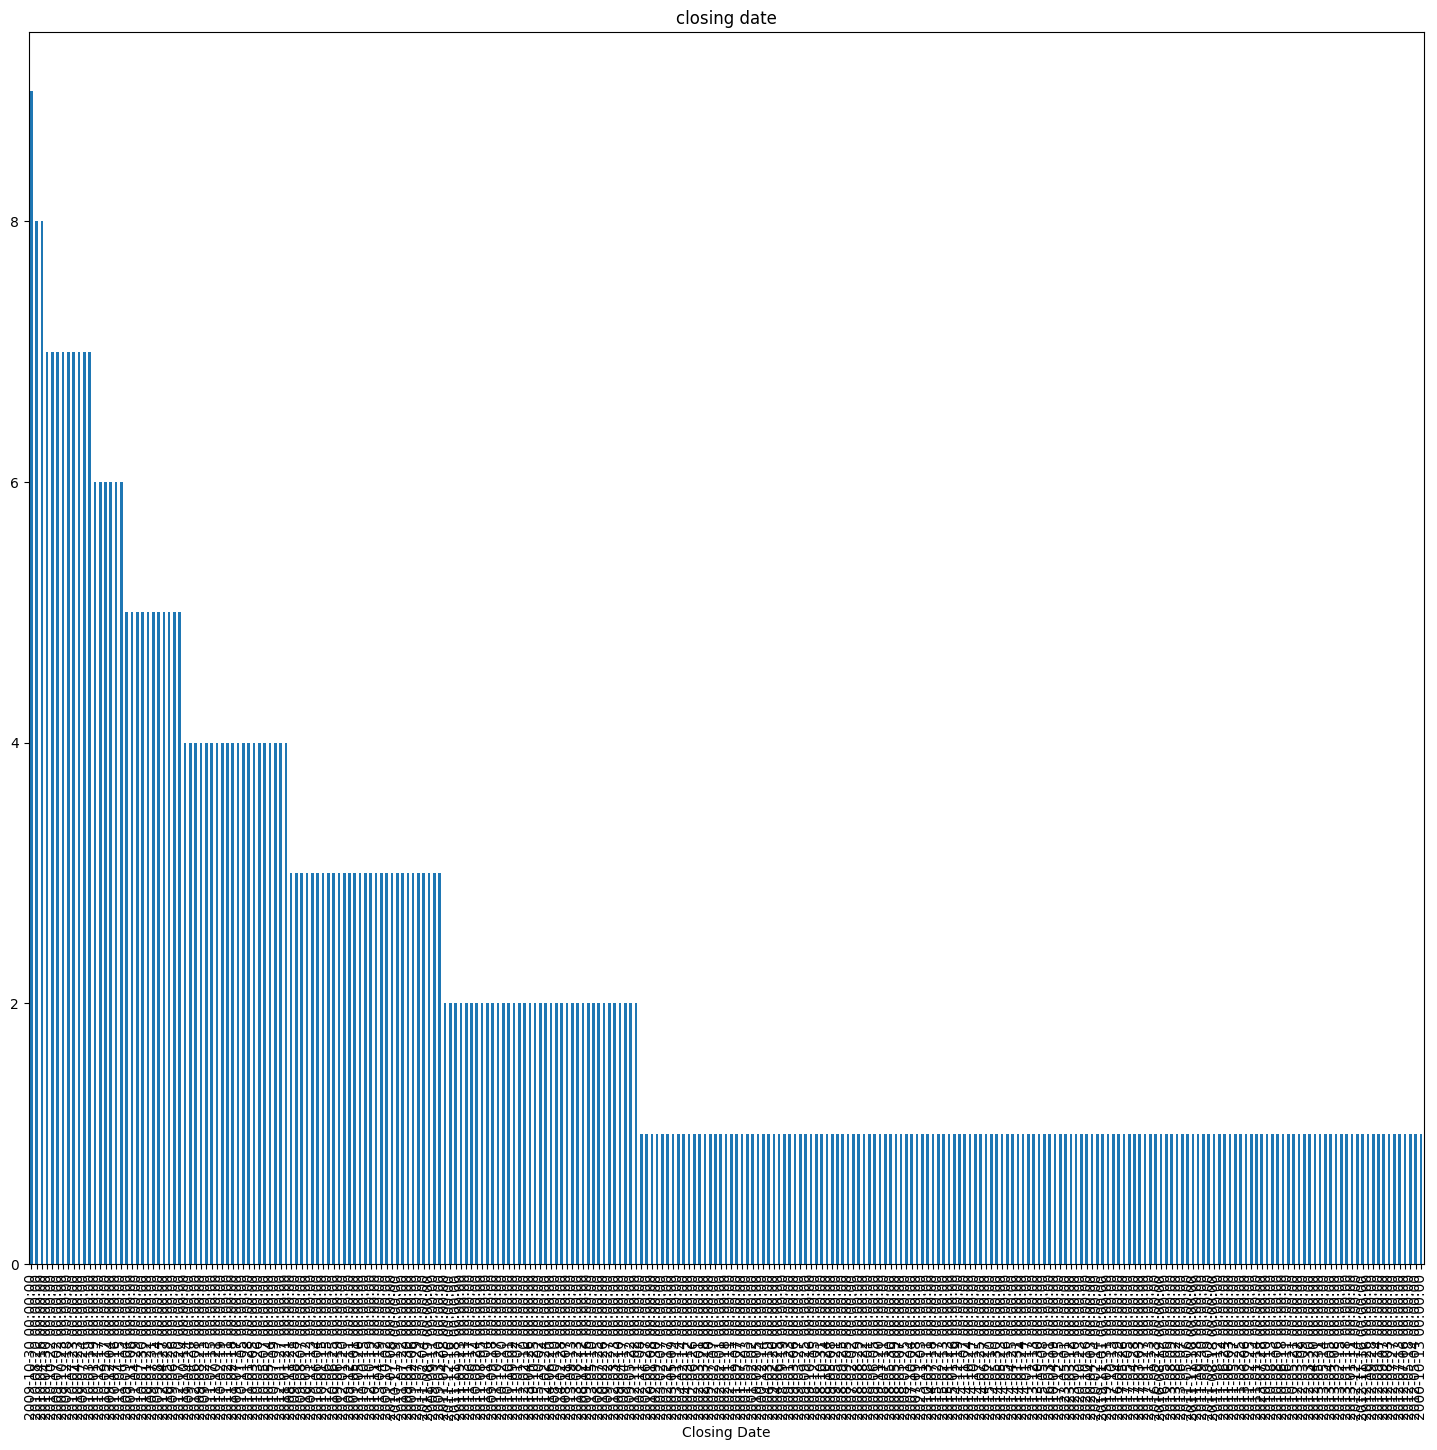

In [28]:
df['Closing Date'].value_counts().plot(kind='bar', title='closing date', figsize=(18,16))


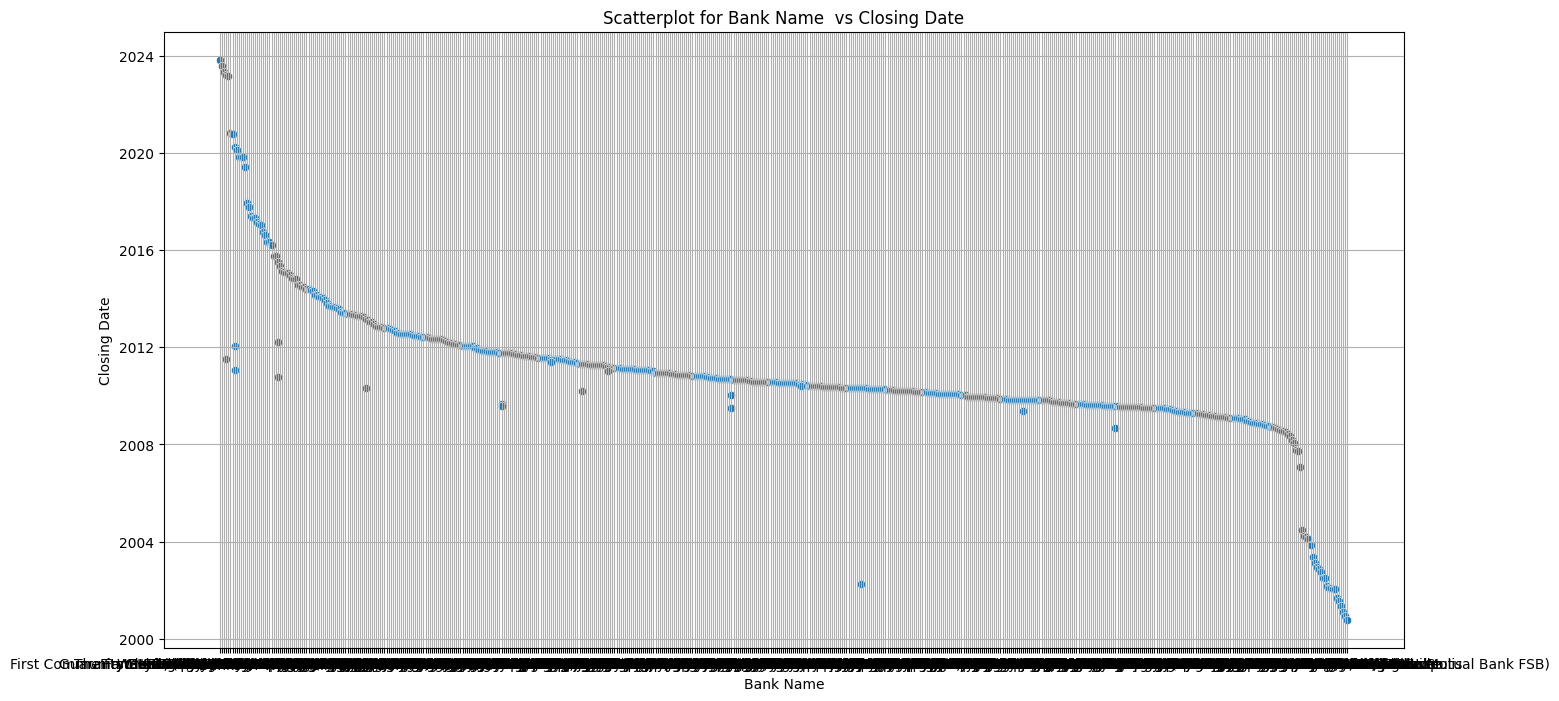

In [29]:
plt.figure(figsize=(16,8))
sns.scatterplot(data=df, x='Bank Name', y='Closing Date')
plt.title('Scatterplot for Bank Name  vs Closing Date')
plt.grid()
plt.show()

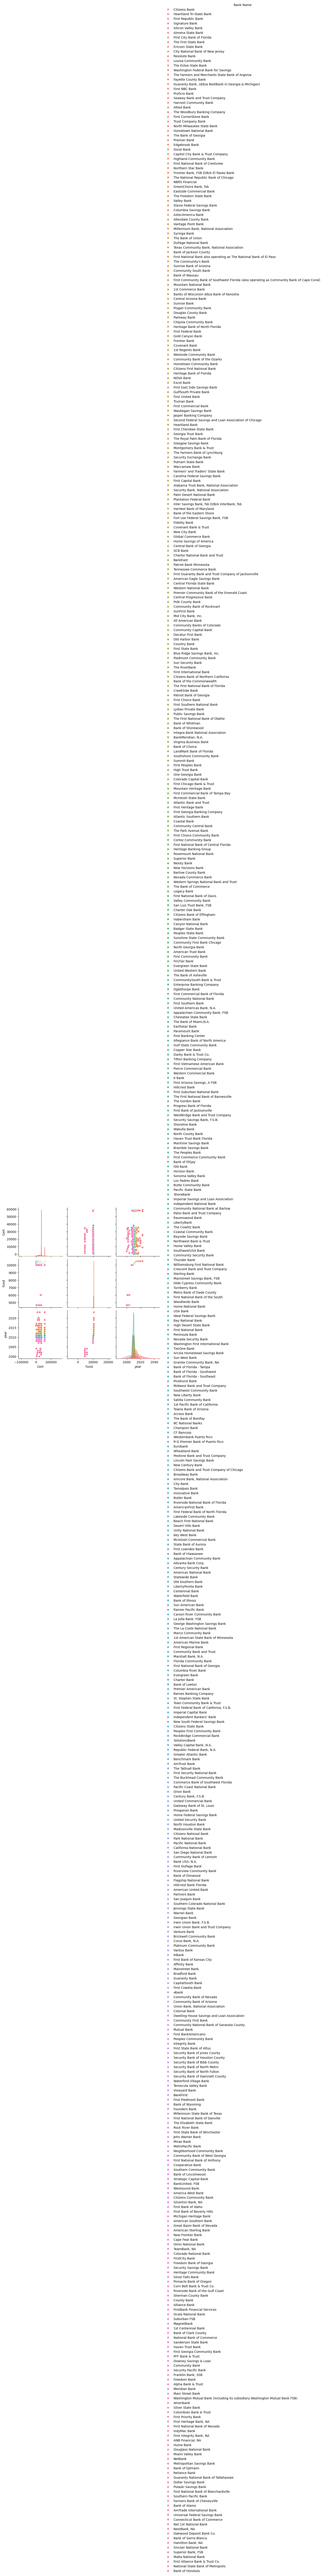

In [32]:
sns.pairplot(data=df, hue='Bank Name')
plt.show()


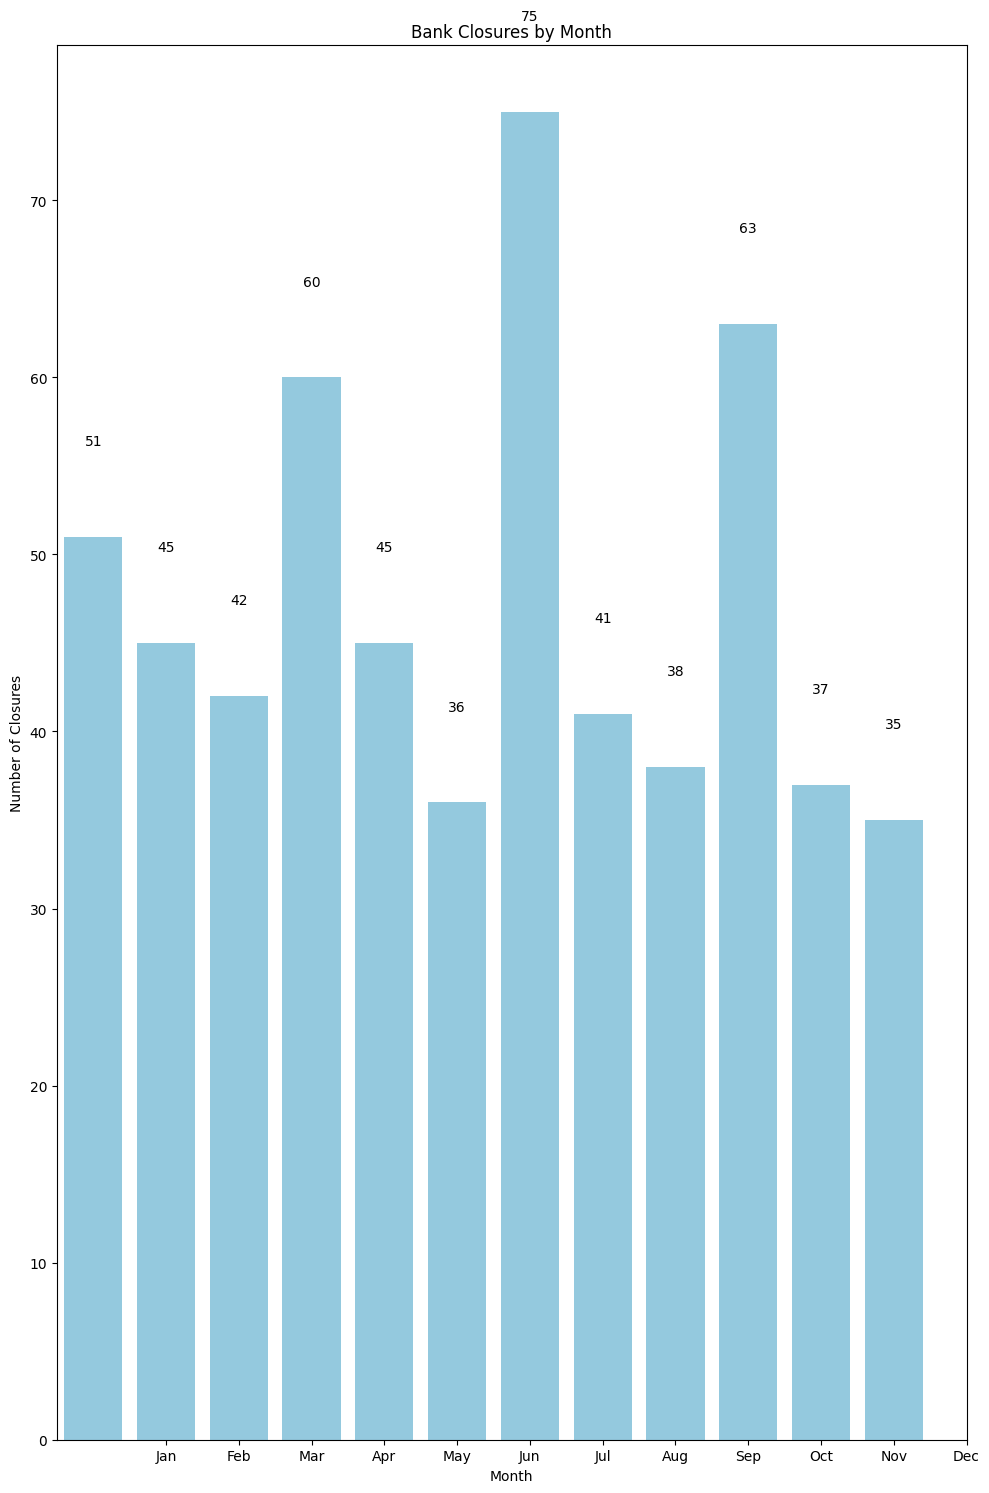

In [33]:
df['Month'] = df['Closing Date'].dt.month
monthly_analysis = df['Month'].value_counts().sort_index()

# Plot distribution of bank closures by month
plt.figure(figsize=(10, 15))
sns.barplot(x=monthly_analysis.index, y=monthly_analysis.values, color='skyblue')
plt.title('Bank Closures by Month')
plt.xlabel('Month')
plt.ylabel('Number of Closures')
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
for i, value in enumerate(monthly_analysis.values):
    plt.text(i, value + 5, str(value), ha='center', va='bottom')

plt.tight_layout()
plt.show()

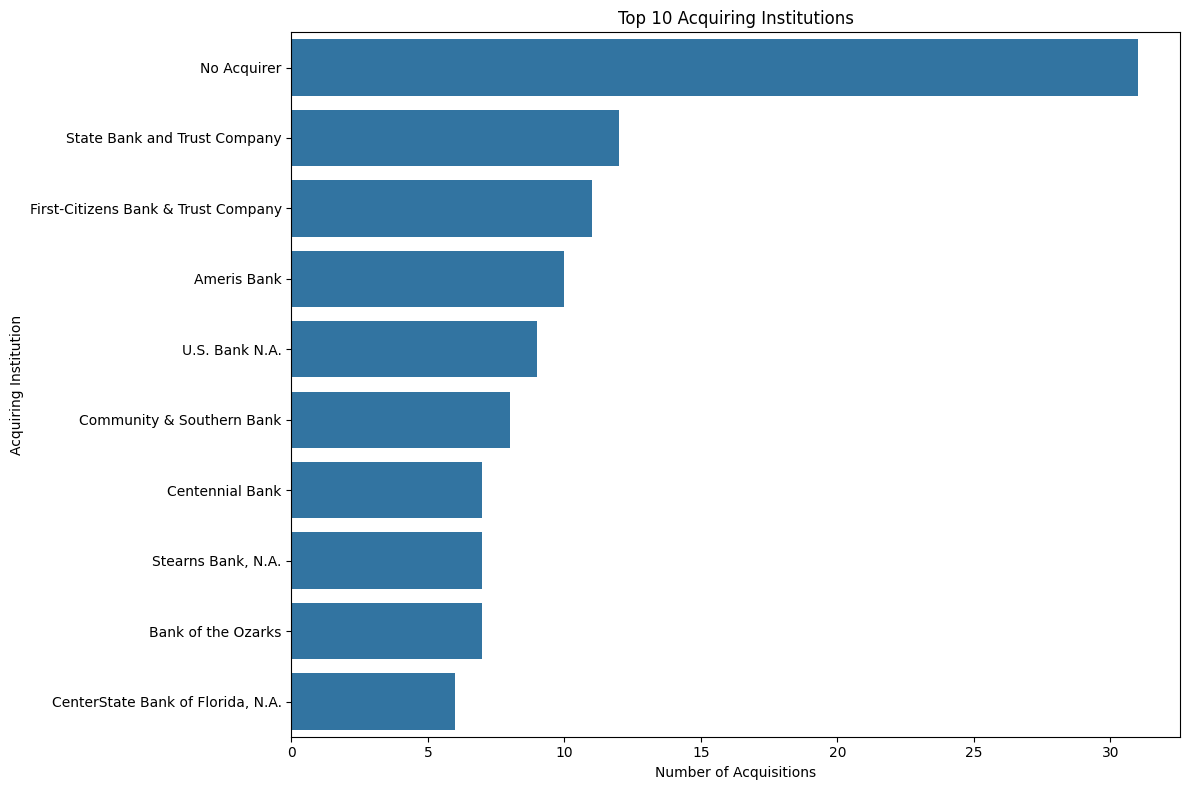

In [34]:
# Institutional Analysis: Most active acquiring institutions
institutional_analysis = df['Acquiring Institution'].value_counts().head(10)

# Plot institutional analysis
plt.figure(figsize=(12, 8))
sns.barplot(x=institutional_analysis.values, y=institutional_analysis.index, orient='h')
plt.title('Top 10 Acquiring Institutions')
plt.xlabel('Number of Acquisitions')
plt.ylabel('Acquiring Institution')
plt.tight_layout()
plt.show()

In [37]:
df['Year'] = df['Closing Date'].dt.year
temporal_analysis = df.groupby('Year').size()

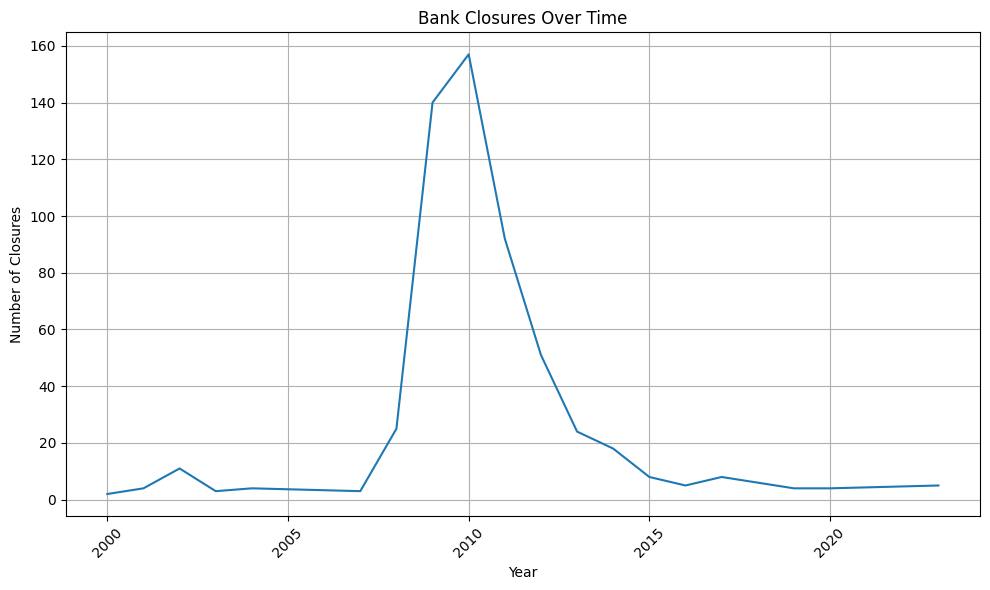

In [38]:
plt.figure(figsize=(10, 6))
sns.lineplot(x=temporal_analysis.index, y=temporal_analysis.values)
plt.title('Bank Closures Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Closures')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()